In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import numpy as np
from load_gan import load_gan
from load_cases import load_cases, load_save_name
from train_gan import train_gan
from evaluation import evaluation
from keras.datasets import mnist

os.environ["KERAS_BACKEND"] = "tensorflow"

Using TensorFlow backend.


In [3]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5)/127.5
x_test = (x_test.astype(np.float32) - 127.5)/127.5
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [4]:
epochs = 10
randomDim = 10
batchSize = 128
examples = 100
cases = load_cases(loss_bases=["Goodfellow"],
                   link_modes=["alpha"],
                   alphas=[1.],
                   offsets=[0.])

In [5]:
for case in cases:
    print(case)
    save_name = load_save_name(case)
    generator, discriminator, gan = load_gan(offset=case["offset"],
                                             alpha=case["alpha"],
                                             randomDim=randomDim,
                                             link_mode=case["link_mode"],
                                             power=case["power"],
                                             mult=case["mult"],
                                             sqrt=case["sqrt"],
                                             loss_base=case["loss_base"])

    to_be_trusted, disc_loss, gen_loss, hurting = train_gan(disc=discriminator,
                                                            gen=generator,
                                                            gan=gan,
                                                            x_train=x_train,
                                                            epochs=epochs,
                                                            batch_size=batchSize,
                                                            d_loss_limit=0.05,
                                                            randomDim=randomDim)
    if to_be_trusted:
        location = "results/" + case["loss_base"] + "/" + case["link_mode"] + "/" + save_name
        evaluation(generator=generator,
                   randomDim=randomDim,
                   location=location,
                   examples=examples, title=save_name,
                   hurting=hurting, gen_loss=gen_loss, disc_loss=disc_loss, x_test=x_test[:examples*examples])

print("LETS GO TO SLEEP \n "*10)

{'link_mode': 'alpha', 'loss_base': 'Goodfellow', 'alpha': 1.0, 'offset': 0.0, 'power': None, 'mult': None, 'sqrt': None}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/home/peseux/Desktop/gitELECOM/NovGan/load_gan.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=10, kernel_initializer=<keras.ini..., kernel_constraint=None)`
  W_constraint=W_constraint))
/home/peseux/Desktop/gitELECOM/NovGan/load_gan.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_constraint=None)`
  W_constraint=W_constraint))
/home/peseux/Desktop/gitELECOM/NovGan/load_gan.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, kernel_constraint=None)`
  W_constraint=W_constraint))
/home/peseux/Desktop/gitELECOM/NovGan/load_gan.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, activation="tanh", kernel_constraint=None)`
  activation='tanh'))
/home/peseux/Desktop/gitELECOM/NovGan/load_gan.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, input_dim=784, kernel_initializer=<keras.ini..., kernel_constraint=None)`
  W_constraint=W_constrai

Instructions for updating:
Use tf.cast instead.


100%|██████████| 10/10 [06:34<00:00, 40.51s/it]


LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 LETS GO TO SLEEP 
 


In [16]:
noise = np.random.normal(0, 1, size=[100, randomDim])

In [17]:
images = generator.predict(noise)

In [18]:
discriminator.evaluate(images, np.zeros(100))

100/100 [==============================] - 0s 127us/step


0.3603042507171631

In [19]:
discriminator.weights[0]

<tf.Variable 'dense_5/kernel:0' shape=(784, 1024) dtype=float32_ref>

In [20]:
images

array([[-1.        , -1.        , -1.        , ..., -0.9999995 ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [-0.99999976, -1.        , -1.        , ..., -1.        ,
        -0.18887791, -0.99998796],
       [-0.99990135, -0.9999218 , -0.9998758 , ..., -0.9997776 ,
        -0.9033345 , -0.9996921 ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -0.9962218 , -0.9999998 ]], dtype=float32)

In [21]:
from matplotlib import pyplot as plt

In [22]:
def plotImages(generatedImages, dim=(10,10), title="title"):
    plt.figure(figsize=dim)
    plt.title(title)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    plt.close()

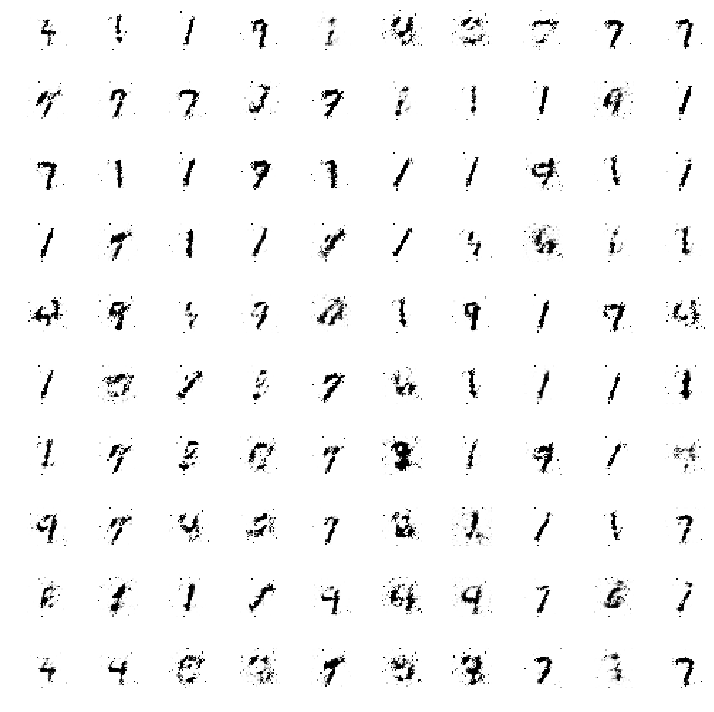

In [25]:
plotImages(images.reshape(100, 28,28))

In [26]:
np.sqrt(784)

28.0